# Word2Vec Example (Amazon Products Reviews)

In [1]:
import numpy as np
import pandas as pd
import gensim

## Loading data

The dataset we are using here is a subset of Amazon reviews from the Cell Phones & Accessories category. The data is stored as a JSON file and can be read using pandas.

Link to the Dataset: http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz


In [2]:
df = pd.read_json("./datasets/Cell_Phones_and_Accessories_5.json",\
    lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [3]:
df.shape

(194439, 9)

## Extract Reviews

Extract review texts, apply simple preprocessing and tokenization. 

In [4]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

In [5]:
review_text

0         [they, look, good, and, stick, good, just, don...
1         [these, stickers, work, like, the, review, say...
2         [these, are, awesome, and, make, my, phone, lo...
3         [item, arrived, in, great, time, and, was, in,...
4         [awesome, stays, on, and, looks, great, can, b...
                                ...                        
194434    [works, great, just, like, my, original, one, ...
194435    [great, product, great, packaging, high, quali...
194436    [this, is, great, cable, just, as, good, as, t...
194437    [really, like, it, becasue, it, works, well, w...
194438    [product, as, described, have, wasted, lot, of...
Name: reviewText, Length: 194439, dtype: object

In [6]:
review_text.loc[0]

['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

## Model Building


https://radimrehurek.com/gensim/models/word2vec.html


| param | description |
|-|-|
| window = 10 |  10 words before the current word and 10 words after |
| min_count = 2 | every sentence should have atleast two words |
| workers = 4 | number of threads in CPUs |

### Continuous Bag of words model

In [24]:
cbow_model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
    sg=0
)

In [25]:
cbow_model.build_vocab(review_text, progress_per=1000)

In [26]:
cbow_model.corpus_count, cbow_model.epochs

(194439, 5)

In [27]:
cbow_model.train(review_text, total_examples=cbow_model.corpus_count, epochs=cbow_model.epochs)

(61506525, 83868975)

In [28]:
cbow_model.wv.most_similar("bad")

[('terrible', 0.6839468479156494),
 ('shabby', 0.6071913838386536),
 ('horrible', 0.6051773428916931),
 ('good', 0.5834843516349792),
 ('awful', 0.5723922848701477),
 ('legit', 0.5297592878341675),
 ('funny', 0.5213862657546997),
 ('disappointing', 0.5114020705223083),
 ('ok', 0.5099763870239258),
 ('poor', 0.507624089717865)]

In [29]:
cbow_model.wv.similarity(w1="cheap", w2="inexpensive")

0.5118147

### Skip-grams model

In [31]:
sg_model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
    sg=1
)

In [32]:
sg_model.build_vocab(review_text, progress_per=1000)

In [33]:
sg_model.corpus_count, sg_model.epochs

(194439, 5)

In [34]:
sg_model.train(review_text, total_examples=sg_model.corpus_count, epochs=sg_model.epochs)

(61501632, 83868975)

In [35]:
sg_model.wv.most_similar("bad")

[('terrible', 0.7510119676589966),
 ('horrible', 0.7072789669036865),
 ('good', 0.6595520377159119),
 ('soso', 0.6567561030387878),
 ('ok', 0.6563253402709961),
 ('okay', 0.6561095118522644),
 ('bleached', 0.6534101366996765),
 ('trilled', 0.6488171815872192),
 ('poor', 0.6452155113220215),
 ('stinks', 0.6401873230934143)]

In [36]:
sg_model.wv.similarity(w1="cheap", w2="inexpensive")

0.6635918

## Compare Models

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
def plot_word_similarities(word):
    cbow_sims = pd.DataFrame(cbow_model.wv.most_similar(word),\
                             columns=['word','cbow_simliarity'])
    sg_sims = pd.DataFrame(sg_model.wv.most_similar(word),\
                           columns=['word','sg_simliarity'])

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    cbow_sims.join(sg_sims.set_index('word'), on='word', \
                   how='outer').plot.barh(x='word', ax=ax)
    plt.show()

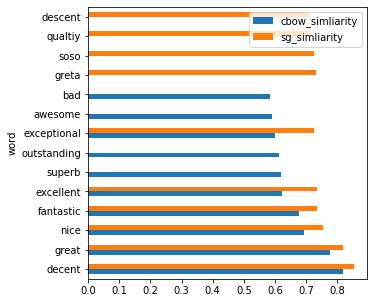

In [151]:
plot_word_similarities('good')

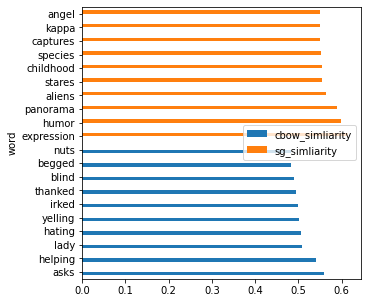

In [152]:
plot_word_similarities('smile')

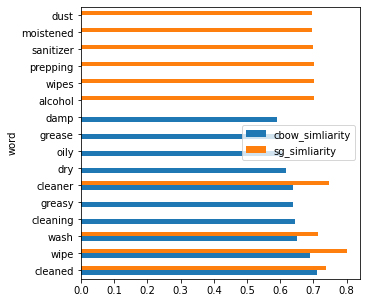

In [153]:
plot_word_similarities('clean')